In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition/HR-Employee-Attrition.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


pd.set_option('display.max_columns',None)#to make all columns visible

In [3]:
df = pd.read_csv('/kaggle/input/employee-attrition/HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis - EDA

In [5]:
df.info()
#looks like there is no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
def normal(col):
    print('No of unique values:\t', df[col].nunique())
    print('Values Count:\n',df[col].value_counts())

In [8]:
def percent_cat(col):
    groupped = df.groupby([col])['Attrition'].value_counts()
    y=0
    for i in groupped.index:
        total_val = len(df[df[col]==i[0]])
        print(f'Percent of {i[1]} Employee Attrition of {i[0]} employee in column {col} is {round((groupped[i]/total_val)*100,2)}%')
        y+=1
        if y==2:
            print('\n')
            y=0

In [9]:
normal('Age')

No of unique values:	 43
Values Count:
 35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


**Observation**:
* Employees with age 35 were higher.

In [10]:
def insight(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = df[col], hue = df['Attrition'])

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

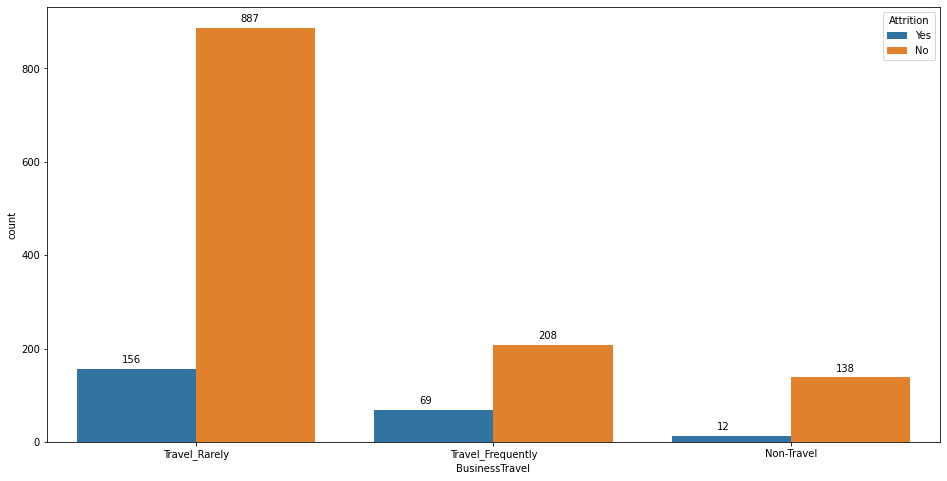

In [11]:
insight('BusinessTravel')

In [12]:
percent_cat('BusinessTravel')

Percent of No Employee Attrition of Non-Travel employee in column BusinessTravel is 92.0%
Percent of Yes Employee Attrition of Non-Travel employee in column BusinessTravel is 8.0%


Percent of No Employee Attrition of Travel_Frequently employee in column BusinessTravel is 75.09%
Percent of Yes Employee Attrition of Travel_Frequently employee in column BusinessTravel is 24.91%


Percent of No Employee Attrition of Travel_Rarely employee in column BusinessTravel is 85.04%
Percent of Yes Employee Attrition of Travel_Rarely employee in column BusinessTravel is 14.96%




**Observation**:
* Looks like employee who travel frequently changes their job.

In [13]:
normal('DailyRate')

No of unique values:	 886
Values Count:
 691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64


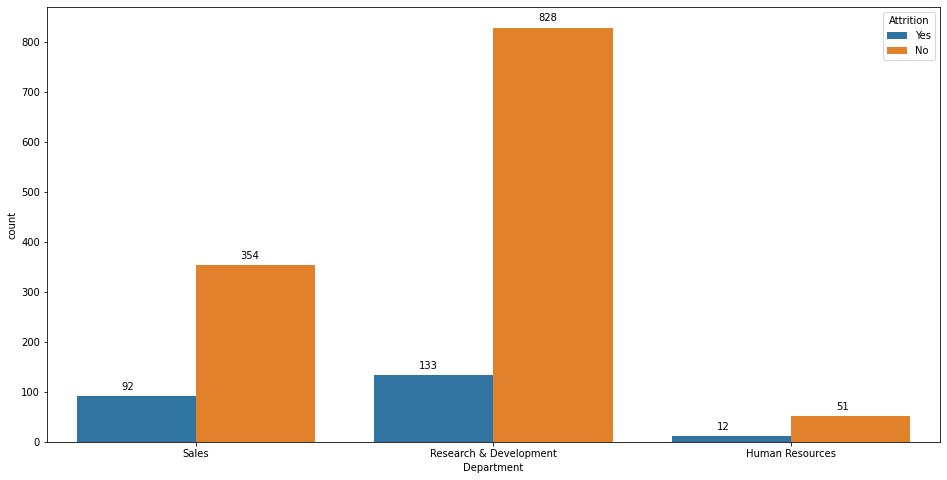

In [14]:
insight('Department')

In [15]:
percent_cat('Department')

Percent of No Employee Attrition of Human Resources employee in column Department is 80.95%
Percent of Yes Employee Attrition of Human Resources employee in column Department is 19.05%


Percent of No Employee Attrition of Research & Development employee in column Department is 86.16%
Percent of Yes Employee Attrition of Research & Development employee in column Department is 13.84%


Percent of No Employee Attrition of Sales employee in column Department is 79.37%
Percent of Yes Employee Attrition of Sales employee in column Department is 20.63%




**Observation**
* R&D Department employees have lesser chance of job change.
* Sales Department employees have higher chance of job change.

In [16]:
normal('DistanceFromHome')

No of unique values:	 29
Values Count:
 2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


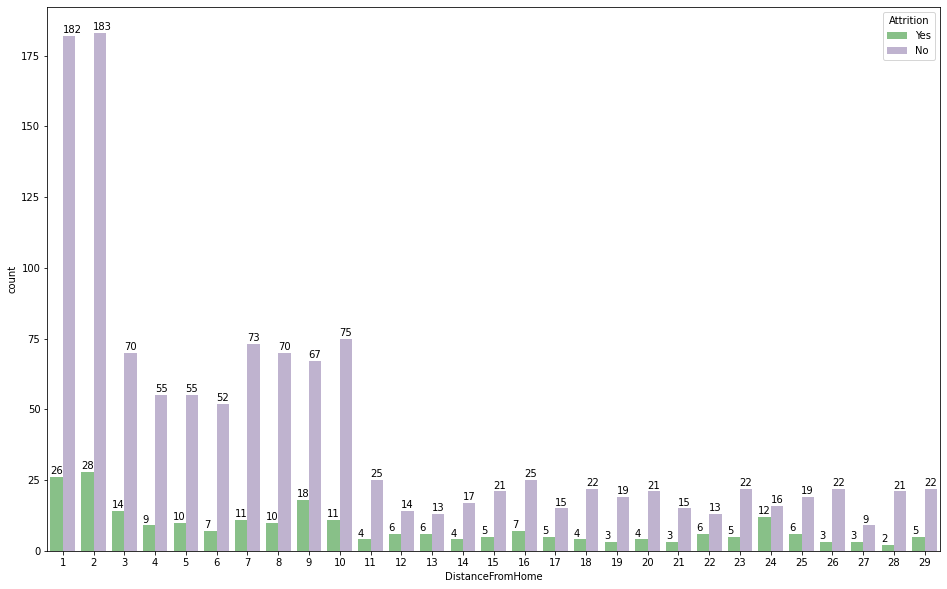

In [17]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x = df['DistanceFromHome'], hue = df['Attrition'], palette='Accent')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()-0.01, p.get_height()+1))

In [18]:
percent_cat('DistanceFromHome')

Percent of No Employee Attrition of 1 employee in column DistanceFromHome is 87.5%
Percent of Yes Employee Attrition of 1 employee in column DistanceFromHome is 12.5%


Percent of No Employee Attrition of 2 employee in column DistanceFromHome is 86.73%
Percent of Yes Employee Attrition of 2 employee in column DistanceFromHome is 13.27%


Percent of No Employee Attrition of 3 employee in column DistanceFromHome is 83.33%
Percent of Yes Employee Attrition of 3 employee in column DistanceFromHome is 16.67%


Percent of No Employee Attrition of 4 employee in column DistanceFromHome is 85.94%
Percent of Yes Employee Attrition of 4 employee in column DistanceFromHome is 14.06%


Percent of No Employee Attrition of 5 employee in column DistanceFromHome is 84.62%
Percent of Yes Employee Attrition of 5 employee in column DistanceFromHome is 15.38%


Percent of No Employee Attrition of 6 employee in column DistanceFromHome is 88.14%
Percent of Yes Employee Attrition of 6 employee in column Dista

In [19]:
df.groupby(['JobRole', 'Attrition']).agg({'DistanceFromHome':np.mean})

DistanceFromHome
JobRole                   Attrition                  
Healthcare Representative No                 9.204918
                          Yes               17.666667
Human Resources           No                 6.600000
                          Yes               13.416667
Laboratory Technician     No                 9.329949
                          Yes                9.661290
Manager                   No                 7.927835
                          Yes               10.000000
Manufacturing Director    No                 9.533333
                          Yes                8.800000
Research Director         No                 8.474359
                          Yes                7.000000
Research Scientist        No                 8.869388
                          Yes                9.765957
Sales Executive           No                 9.026022
                          Yes               12.649123
Sales Representative      No                 9.000000
                          Yes                8.151515

**Observation**
* People with less Distance from Home have the less chances of lead to employee attrition
* People with higher Distance from Home may lead to employee attrition 

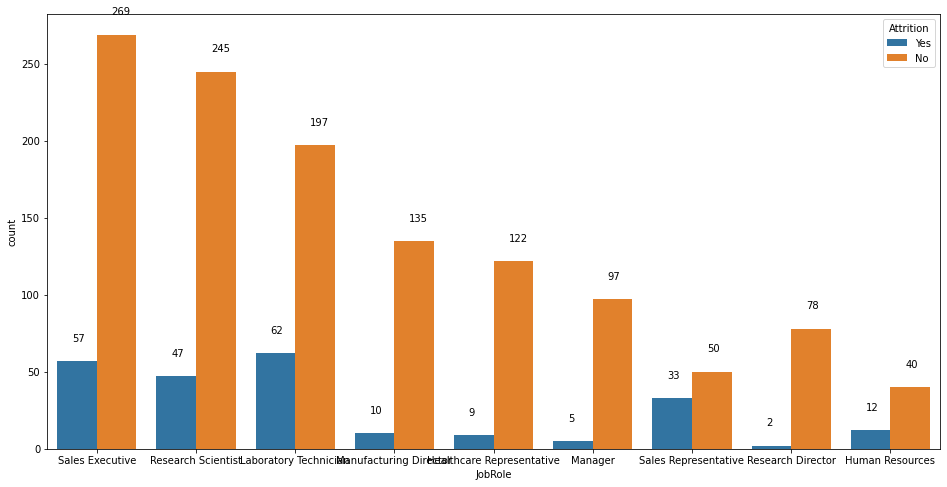

In [20]:
insight('JobRole')

In [21]:
percent_cat('JobRole')

Percent of No Employee Attrition of Healthcare Representative employee in column JobRole is 93.13%
Percent of Yes Employee Attrition of Healthcare Representative employee in column JobRole is 6.87%


Percent of No Employee Attrition of Human Resources employee in column JobRole is 76.92%
Percent of Yes Employee Attrition of Human Resources employee in column JobRole is 23.08%


Percent of No Employee Attrition of Laboratory Technician employee in column JobRole is 76.06%
Percent of Yes Employee Attrition of Laboratory Technician employee in column JobRole is 23.94%


Percent of No Employee Attrition of Manager employee in column JobRole is 95.1%
Percent of Yes Employee Attrition of Manager employee in column JobRole is 4.9%


Percent of No Employee Attrition of Manufacturing Director employee in column JobRole is 93.1%
Percent of Yes Employee Attrition of Manufacturing Director employee in column JobRole is 6.9%


Percent of No Employee Attrition of Research Director employee in column

**Observation**
* From the above analysis Sales Representative employees have changed their job more
* Only lower percent of Research Director were not changed their job.

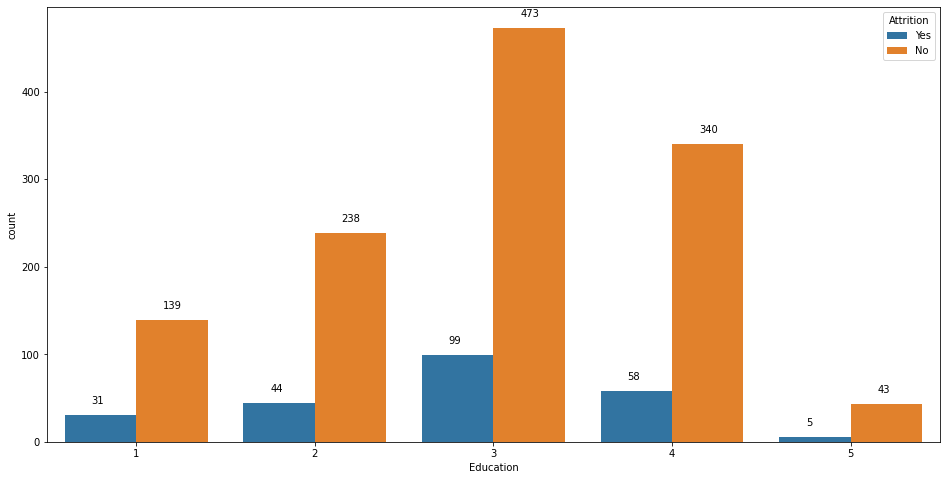

In [22]:
insight('Education')

In [23]:
percent_cat('Education')

Percent of No Employee Attrition of 1 employee in column Education is 81.76%
Percent of Yes Employee Attrition of 1 employee in column Education is 18.24%


Percent of No Employee Attrition of 2 employee in column Education is 84.4%
Percent of Yes Employee Attrition of 2 employee in column Education is 15.6%


Percent of No Employee Attrition of 3 employee in column Education is 82.69%
Percent of Yes Employee Attrition of 3 employee in column Education is 17.31%


Percent of No Employee Attrition of 4 employee in column Education is 85.43%
Percent of Yes Employee Attrition of 4 employee in column Education is 14.57%


Percent of No Employee Attrition of 5 employee in column Education is 89.58%
Percent of Yes Employee Attrition of 5 employee in column Education is 10.42%




**Observation**
* 3rd level and 1st level education category employee has higher possibility of employee attrition

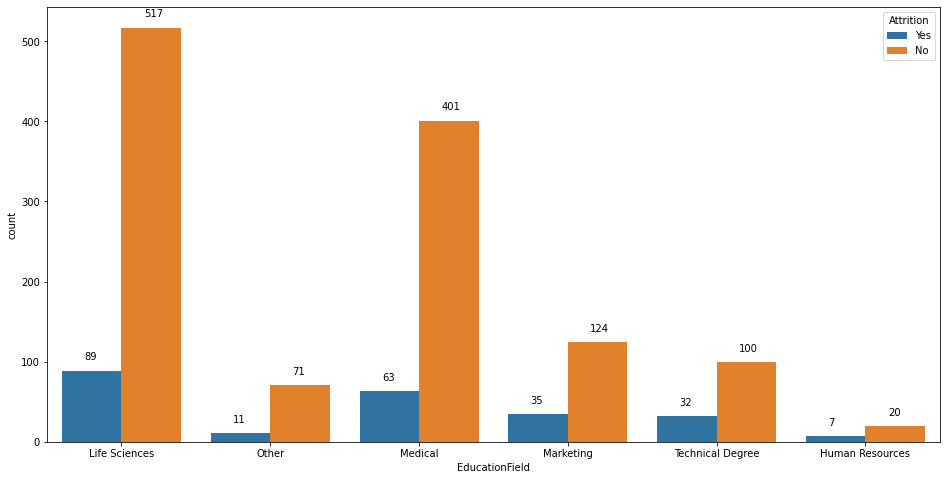

In [24]:
insight('EducationField')

In [25]:
percent_cat('EducationField')

Percent of No Employee Attrition of Human Resources employee in column EducationField is 74.07%
Percent of Yes Employee Attrition of Human Resources employee in column EducationField is 25.93%


Percent of No Employee Attrition of Life Sciences employee in column EducationField is 85.31%
Percent of Yes Employee Attrition of Life Sciences employee in column EducationField is 14.69%


Percent of No Employee Attrition of Marketing employee in column EducationField is 77.99%
Percent of Yes Employee Attrition of Marketing employee in column EducationField is 22.01%


Percent of No Employee Attrition of Medical employee in column EducationField is 86.42%
Percent of Yes Employee Attrition of Medical employee in column EducationField is 13.58%


Percent of No Employee Attrition of Other employee in column EducationField is 86.59%
Percent of Yes Employee Attrition of Other employee in column EducationField is 13.41%


Percent of No Employee Attrition of Technical Degree employee in column Educa

**Observation**
* Life Sciences and Medical education field employee has higher possibility of not changing their job.
* Human Resource and Technical Degree employees were changed their job in more amount.

In [26]:
normal('EmployeeCount')

No of unique values:	 1
Values Count:
 1    1470
Name: EmployeeCount, dtype: int64


**Observation**
* Employee count column has only one value in all rows, so probably we can drop this column.

In [27]:
normal('EmployeeNumber')

No of unique values:	 1470
Values Count:
 2048    1
1368    1
1364    1
1363    1
1362    1
       ..
648     1
647     1
645     1
644     1
2046    1
Name: EmployeeNumber, Length: 1470, dtype: int64


**Observation**
* Each row of Employee Number column has unique value, so we can drop this column during modelling

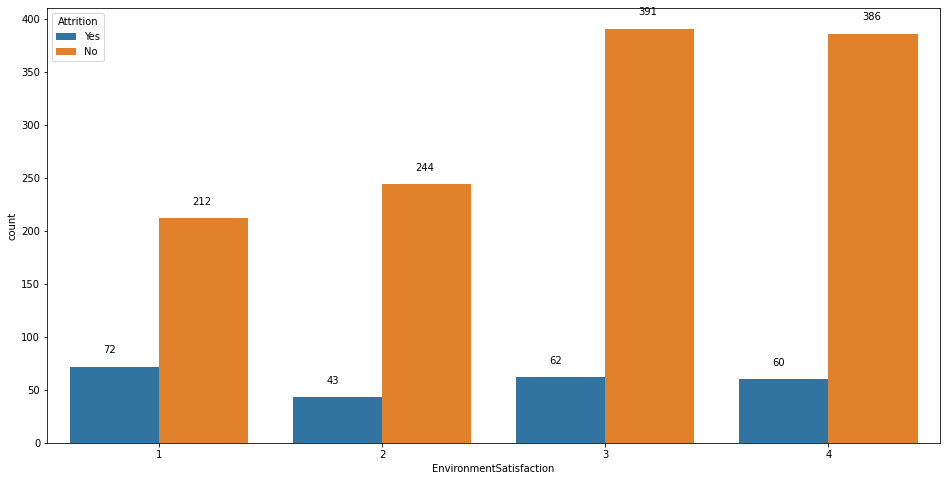

In [28]:
insight('EnvironmentSatisfaction')

In [29]:
percent_cat('EnvironmentSatisfaction')

Percent of No Employee Attrition of 1 employee in column EnvironmentSatisfaction is 74.65%
Percent of Yes Employee Attrition of 1 employee in column EnvironmentSatisfaction is 25.35%


Percent of No Employee Attrition of 2 employee in column EnvironmentSatisfaction is 85.02%
Percent of Yes Employee Attrition of 2 employee in column EnvironmentSatisfaction is 14.98%


Percent of No Employee Attrition of 3 employee in column EnvironmentSatisfaction is 86.31%
Percent of Yes Employee Attrition of 3 employee in column EnvironmentSatisfaction is 13.69%


Percent of No Employee Attrition of 4 employee in column EnvironmentSatisfaction is 86.55%
Percent of Yes Employee Attrition of 4 employee in column EnvironmentSatisfaction is 13.45%




**Observation**:
* Environment Satisfaction with value 3 & 4 have higher chance of not changing their job.
* Employees with environment satisfaction 1 have changed thir job more.

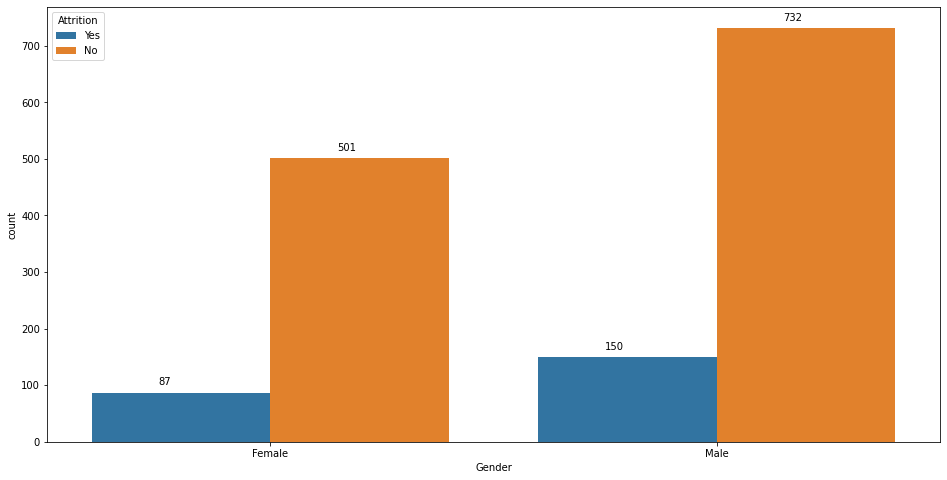

In [30]:
insight('Gender')

In [31]:
percent_cat('Gender')

Percent of No Employee Attrition of Female employee in column Gender is 85.2%
Percent of Yes Employee Attrition of Female employee in column Gender is 14.8%


Percent of No Employee Attrition of Male employee in column Gender is 82.99%
Percent of Yes Employee Attrition of Male employee in column Gender is 17.01%




**Observation**:
* There is no significant difference between male and female employees in changing their job
* More number of employees were male.

In [32]:
normal('HourlyRate')

No of unique values:	 71
Values Count:
 66    29
42    28
98    28
84    28
48    28
      ..
69    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64


<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

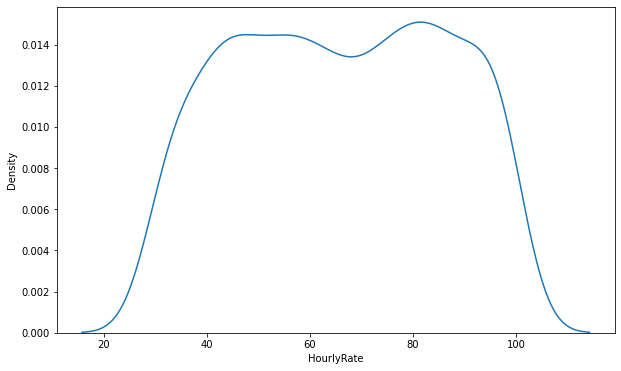

In [33]:
plt.figure(figsize=(10,6))
sns.kdeplot(x = df['HourlyRate']) 
#Hourly rate follows normal distribution

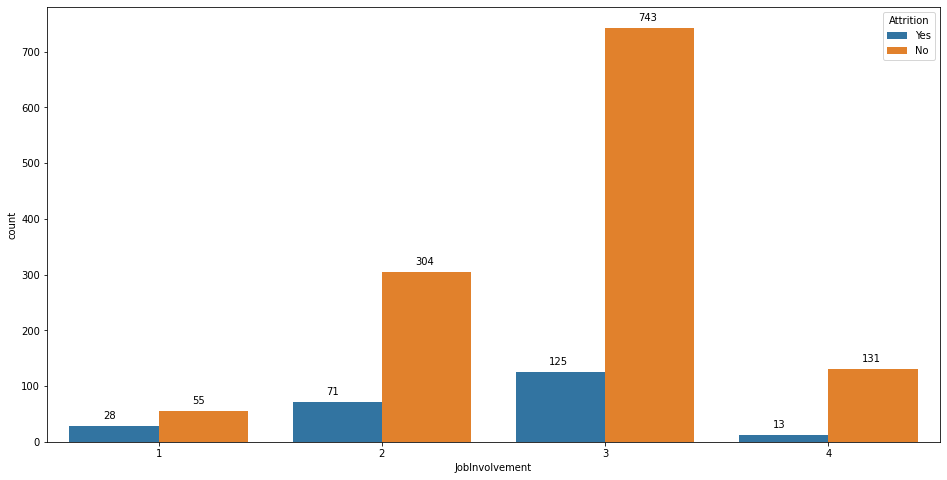

In [34]:
insight('JobInvolvement')

In [35]:
percent_cat('JobInvolvement')

Percent of No Employee Attrition of 1 employee in column JobInvolvement is 66.27%
Percent of Yes Employee Attrition of 1 employee in column JobInvolvement is 33.73%


Percent of No Employee Attrition of 2 employee in column JobInvolvement is 81.07%
Percent of Yes Employee Attrition of 2 employee in column JobInvolvement is 18.93%


Percent of No Employee Attrition of 3 employee in column JobInvolvement is 85.6%
Percent of Yes Employee Attrition of 3 employee in column JobInvolvement is 14.4%


Percent of No Employee Attrition of 4 employee in column JobInvolvement is 90.97%
Percent of Yes Employee Attrition of 4 employee in column JobInvolvement is 9.03%




**Observations:**
* JobInvolvement level 1 employees have higher number of job change, whereas Job Involvement level 4 employees have lesser number of job change.

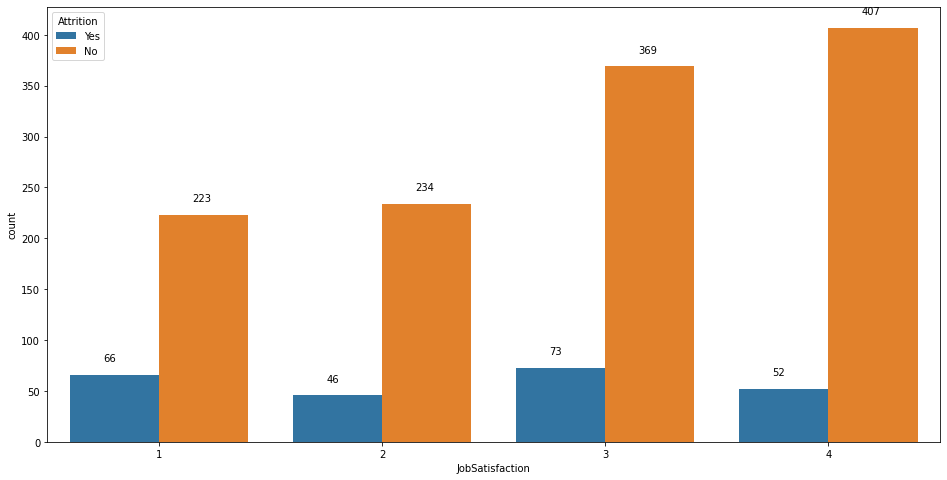

In [36]:
insight('JobSatisfaction')

In [37]:
percent_cat('JobSatisfaction')

Percent of No Employee Attrition of 1 employee in column JobSatisfaction is 77.16%
Percent of Yes Employee Attrition of 1 employee in column JobSatisfaction is 22.84%


Percent of No Employee Attrition of 2 employee in column JobSatisfaction is 83.57%
Percent of Yes Employee Attrition of 2 employee in column JobSatisfaction is 16.43%


Percent of No Employee Attrition of 3 employee in column JobSatisfaction is 83.48%
Percent of Yes Employee Attrition of 3 employee in column JobSatisfaction is 16.52%


Percent of No Employee Attrition of 4 employee in column JobSatisfaction is 88.67%
Percent of Yes Employee Attrition of 4 employee in column JobSatisfaction is 11.33%




**Observation**:
* Job Satisfaction level 1 employees have higher number of job change, whereas Job Satisfaction level 4 employees have lesser number of job change.

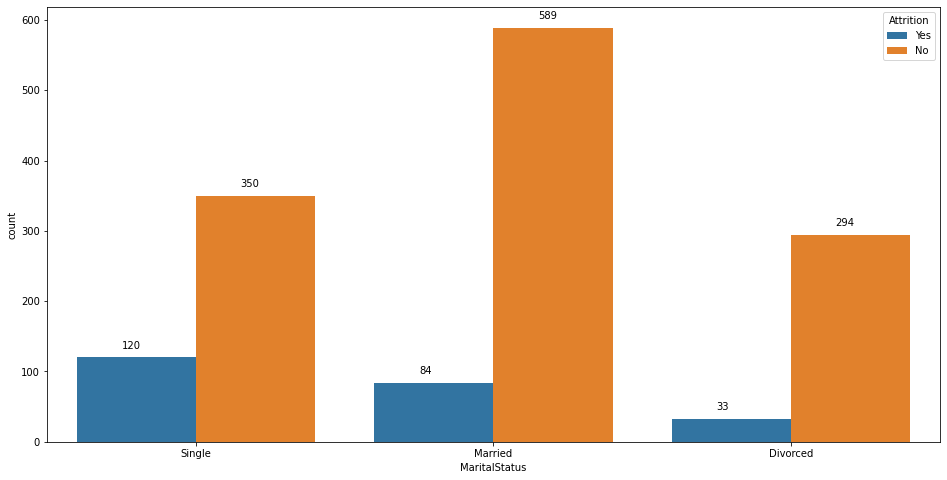

In [38]:
insight('MaritalStatus')

In [39]:
percent_cat('MaritalStatus')

Percent of No Employee Attrition of Divorced employee in column MaritalStatus is 89.91%
Percent of Yes Employee Attrition of Divorced employee in column MaritalStatus is 10.09%


Percent of No Employee Attrition of Married employee in column MaritalStatus is 87.52%
Percent of Yes Employee Attrition of Married employee in column MaritalStatus is 12.48%


Percent of No Employee Attrition of Single employee in column MaritalStatus is 74.47%
Percent of Yes Employee Attrition of Single employee in column MaritalStatus is 25.53%




**Observation**:
* Quite Interesting Bachelor employees changed their job in large amount.

In [40]:
normal('MonthlyIncome')

No of unique values:	 1349
Values Count:
 2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64


In [41]:
normal('MonthlyRate')

No of unique values:	 1427
Values Count:
 4223     3
9150     3
9096     2
13008    2
12858    2
        ..
17071    1
23213    1
3835     1
25258    1
12287    1
Name: MonthlyRate, Length: 1427, dtype: int64


In [42]:
df.groupby(['Education','Attrition']).agg({'MonthlyIncome':np.mean}).head(30)

MonthlyIncome
Education Attrition               
1         No           5926.129496
          Yes          4360.161290
2         No           6586.058824
          Yes          4282.545455
3         No           6882.919662
          Yes          4770.242424
4         No           7087.814706
          Yes          5335.155172
5         No           8559.906977
          Yes          5850.200000

**Observation**:
* Education level 5 with no job change has higher average of Monthly Income.
* In all category education level, employees changed their job due to low monthly Income.

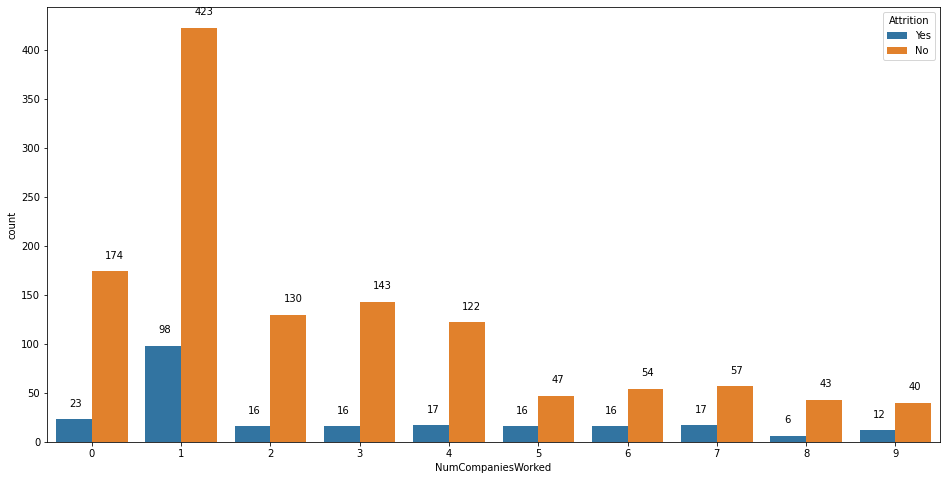

In [43]:
insight('NumCompaniesWorked')

In [44]:
percent_cat('NumCompaniesWorked')

Percent of No Employee Attrition of 0 employee in column NumCompaniesWorked is 88.32%
Percent of Yes Employee Attrition of 0 employee in column NumCompaniesWorked is 11.68%


Percent of No Employee Attrition of 1 employee in column NumCompaniesWorked is 81.19%
Percent of Yes Employee Attrition of 1 employee in column NumCompaniesWorked is 18.81%


Percent of No Employee Attrition of 2 employee in column NumCompaniesWorked is 89.04%
Percent of Yes Employee Attrition of 2 employee in column NumCompaniesWorked is 10.96%


Percent of No Employee Attrition of 3 employee in column NumCompaniesWorked is 89.94%
Percent of Yes Employee Attrition of 3 employee in column NumCompaniesWorked is 10.06%


Percent of No Employee Attrition of 4 employee in column NumCompaniesWorked is 87.77%
Percent of Yes Employee Attrition of 4 employee in column NumCompaniesWorked is 12.23%


Percent of No Employee Attrition of 5 employee in column NumCompaniesWorked is 74.6%
Percent of Yes Employee Attrition of 5 e

**Observation**:
* Employees who have worked in less than 4 companies have lesser chance of changing their job.
* Higher the number of companies worked, higher the chance of changing their job.

In [45]:
normal('Over18')
#This column has only one unique column, so we can drop this column

No of unique values:	 1
Values Count:
 Y    1470
Name: Over18, dtype: int64


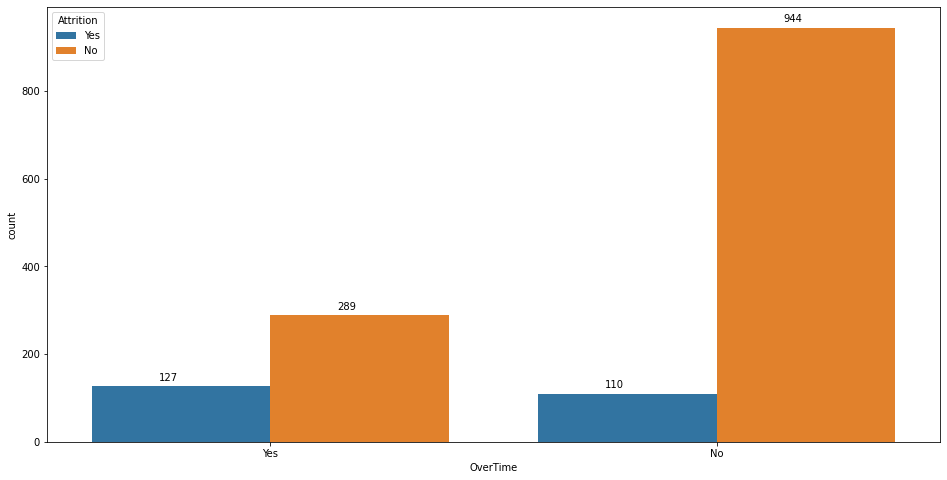

In [46]:
insight('OverTime')

In [47]:
percent_cat('OverTime')

Percent of No Employee Attrition of No employee in column OverTime is 89.56%
Percent of Yes Employee Attrition of No employee in column OverTime is 10.44%


Percent of No Employee Attrition of Yes employee in column OverTime is 69.47%
Percent of Yes Employee Attrition of Yes employee in column OverTime is 30.53%




**Observation**:
* Employees who did overtime have higher chance of changing their job

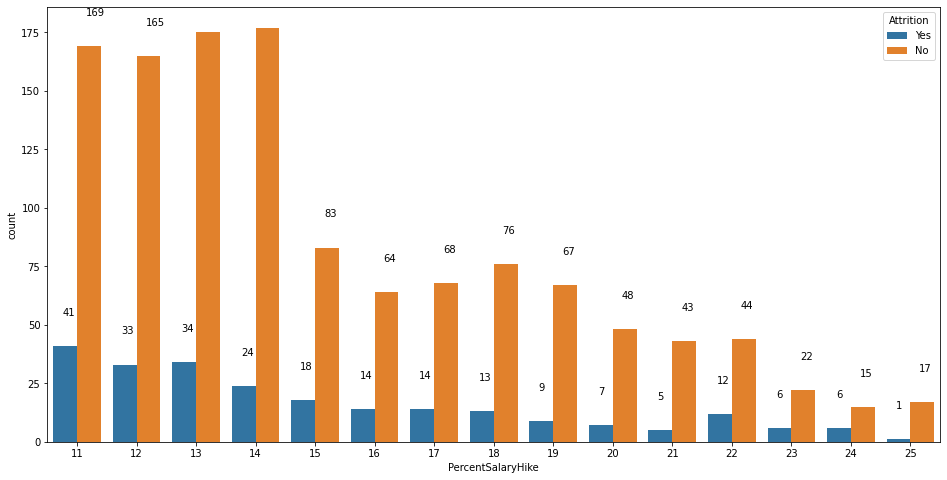

In [48]:
insight('PercentSalaryHike')

In [49]:
percent_cat('PercentSalaryHike')

Percent of No Employee Attrition of 11 employee in column PercentSalaryHike is 80.48%
Percent of Yes Employee Attrition of 11 employee in column PercentSalaryHike is 19.52%


Percent of No Employee Attrition of 12 employee in column PercentSalaryHike is 83.33%
Percent of Yes Employee Attrition of 12 employee in column PercentSalaryHike is 16.67%


Percent of No Employee Attrition of 13 employee in column PercentSalaryHike is 83.73%
Percent of Yes Employee Attrition of 13 employee in column PercentSalaryHike is 16.27%


Percent of No Employee Attrition of 14 employee in column PercentSalaryHike is 88.06%
Percent of Yes Employee Attrition of 14 employee in column PercentSalaryHike is 11.94%


Percent of No Employee Attrition of 15 employee in column PercentSalaryHike is 82.18%
Percent of Yes Employee Attrition of 15 employee in column PercentSalaryHike is 17.82%


Percent of No Employee Attrition of 16 employee in column PercentSalaryHike is 82.05%
Percent of Yes Employee Attrition of 16

**Observation**
* Lower the salary hike of employees, higher the chance of job change.

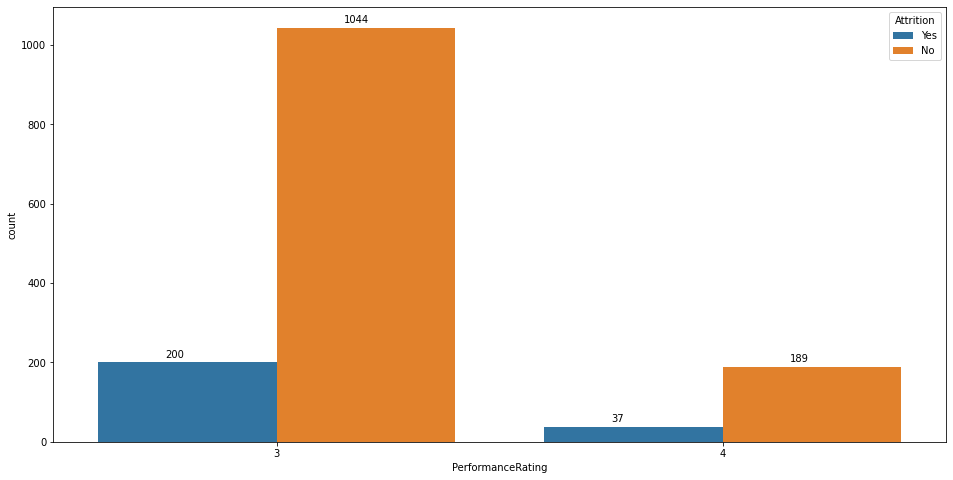

In [50]:
insight('PerformanceRating')

In [51]:
percent_cat('PerformanceRating')

Percent of No Employee Attrition of 3 employee in column PerformanceRating is 83.92%
Percent of Yes Employee Attrition of 3 employee in column PerformanceRating is 16.08%


Percent of No Employee Attrition of 4 employee in column PerformanceRating is 83.63%
Percent of Yes Employee Attrition of 4 employee in column PerformanceRating is 16.37%




**Observation**
* There is no significant difference between Performance Rating level 3 and 4.

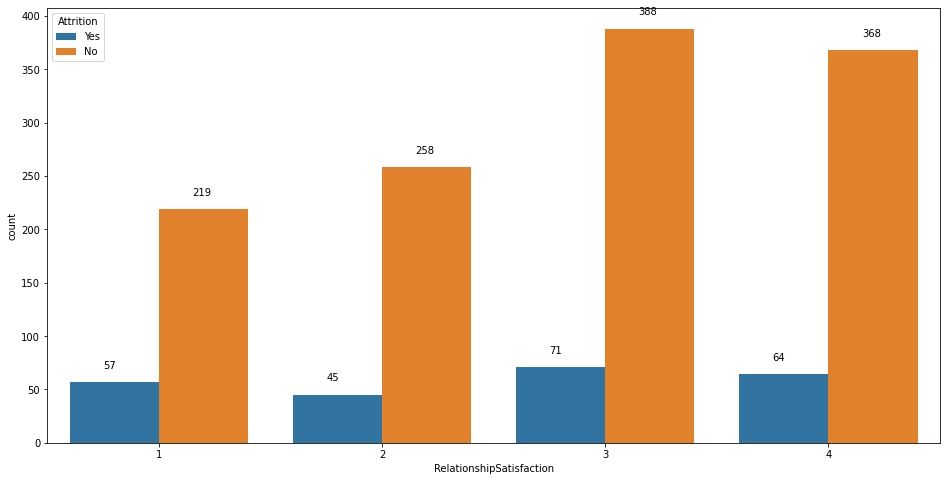

In [52]:
insight('RelationshipSatisfaction')

In [53]:
percent_cat('RelationshipSatisfaction')

Percent of No Employee Attrition of 1 employee in column RelationshipSatisfaction is 79.35%
Percent of Yes Employee Attrition of 1 employee in column RelationshipSatisfaction is 20.65%


Percent of No Employee Attrition of 2 employee in column RelationshipSatisfaction is 85.15%
Percent of Yes Employee Attrition of 2 employee in column RelationshipSatisfaction is 14.85%


Percent of No Employee Attrition of 3 employee in column RelationshipSatisfaction is 84.53%
Percent of Yes Employee Attrition of 3 employee in column RelationshipSatisfaction is 15.47%


Percent of No Employee Attrition of 4 employee in column RelationshipSatisfaction is 85.19%
Percent of Yes Employee Attrition of 4 employee in column RelationshipSatisfaction is 14.81%




**Observation:**
* Employees with Relationship Satisfaction level 1 changed their job in large amount.


In [54]:
normal('StandardHours')
#There is only one value in this column

No of unique values:	 1
Values Count:
 80    1470
Name: StandardHours, dtype: int64


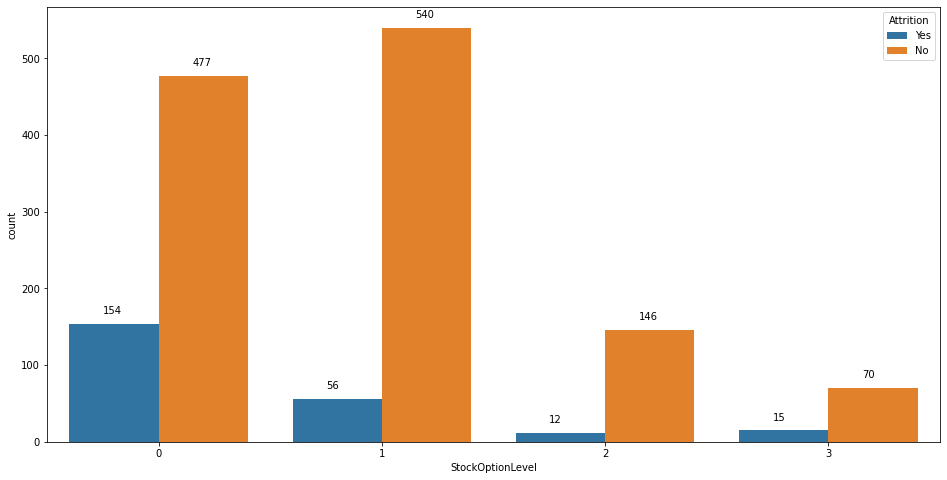

In [55]:
insight('StockOptionLevel')

In [56]:
percent_cat('StockOptionLevel')

Percent of No Employee Attrition of 0 employee in column StockOptionLevel is 75.59%
Percent of Yes Employee Attrition of 0 employee in column StockOptionLevel is 24.41%


Percent of No Employee Attrition of 1 employee in column StockOptionLevel is 90.6%
Percent of Yes Employee Attrition of 1 employee in column StockOptionLevel is 9.4%


Percent of No Employee Attrition of 2 employee in column StockOptionLevel is 92.41%
Percent of Yes Employee Attrition of 2 employee in column StockOptionLevel is 7.59%


Percent of No Employee Attrition of 3 employee in column StockOptionLevel is 82.35%
Percent of Yes Employee Attrition of 3 employee in column StockOptionLevel is 17.65%




**Observation:**
* Employees who have had no stock option have changed their job in high percent.

In [57]:
groupped = df.groupby(['JobLevel'])['StockOptionLevel'].value_counts()
y=0
for i in groupped.index:
    total_val = len(df[df['JobLevel']==i[0]])
    print(f'Percent of Stock Option Level {i[1]} in joblevel {i[0]} is {round((groupped[i]/total_val)*100,2)}%')
    y+=1
    if y==4:
        print('\n')
        y=0

Percent of Stock Option Level 0 in joblevel 1 is 47.33%
Percent of Stock Option Level 1 in joblevel 1 is 37.94%
Percent of Stock Option Level 2 in joblevel 1 is 7.55%
Percent of Stock Option Level 3 in joblevel 1 is 7.18%


Percent of Stock Option Level 0 in joblevel 2 is 41.01%
Percent of Stock Option Level 1 in joblevel 2 is 38.76%
Percent of Stock Option Level 2 in joblevel 2 is 15.54%
Percent of Stock Option Level 3 in joblevel 2 is 4.68%


Percent of Stock Option Level 1 in joblevel 3 is 44.5%
Percent of Stock Option Level 0 in joblevel 3 is 39.45%
Percent of Stock Option Level 2 in joblevel 3 is 10.09%
Percent of Stock Option Level 3 in joblevel 3 is 5.96%


Percent of Stock Option Level 1 in joblevel 4 is 46.23%
Percent of Stock Option Level 0 in joblevel 4 is 40.57%
Percent of Stock Option Level 2 in joblevel 4 is 7.55%
Percent of Stock Option Level 3 in joblevel 4 is 5.66%


Percent of Stock Option Level 1 in joblevel 5 is 53.62%
Percent of Stock Option Level 0 in joblevel 5 i

**Observation**
* From the above analysis Employees with job level 5 was given higher percent of Stock.

In [58]:
normal('JobLevel')

No of unique values:	 5
Values Count:
 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


In [59]:
df.groupby(['JobLevel','StockOptionLevel'])['Attrition'].value_counts()

JobLevel  StockOptionLevel  Attrition
1         0                 No           162
                            Yes           95
          1                 No           171
                            Yes           35
          2                 No            37
                            Yes            4
          3                 No            30
                            Yes            9
2         0                 No           184
                            Yes           35
          1                 No           197
                            Yes           10
          2                 No            77
                            Yes            6
          3                 No            24
                            Yes            1
3         0                 No            69
                            Yes           17
          1                 No            88
                            Yes            9
          2                 No            20
                 

In [60]:
def group(col):
    groupped = df.groupby(col)['Attrition'].value_counts()
    return groupped

In [61]:
group('TotalWorkingYears')

TotalWorkingYears  Attrition
0                  No            6
                   Yes           5
1                  No           41
                   Yes          40
2                  No           22
                                ..
35                 No            3
36                 No            6
37                 No            4
38                 No            1
40                 Yes           2
Name: Attrition, Length: 71, dtype: int64

In [62]:
percent_cat('TrainingTimesLastYear')

Percent of No Employee Attrition of 0 employee in column TrainingTimesLastYear is 72.22%
Percent of Yes Employee Attrition of 0 employee in column TrainingTimesLastYear is 27.78%


Percent of No Employee Attrition of 1 employee in column TrainingTimesLastYear is 87.32%
Percent of Yes Employee Attrition of 1 employee in column TrainingTimesLastYear is 12.68%


Percent of No Employee Attrition of 2 employee in column TrainingTimesLastYear is 82.08%
Percent of Yes Employee Attrition of 2 employee in column TrainingTimesLastYear is 17.92%


Percent of No Employee Attrition of 3 employee in column TrainingTimesLastYear is 85.95%
Percent of Yes Employee Attrition of 3 employee in column TrainingTimesLastYear is 14.05%


Percent of No Employee Attrition of 4 employee in column TrainingTimesLastYear is 78.86%
Percent of Yes Employee Attrition of 4 employee in column TrainingTimesLastYear is 21.14%


Percent of No Employee Attrition of 5 employee in column TrainingTimesLastYear is 88.24%
Percen

**Observation:**
* Employees who were given training recently have changed job in large amount.

In [63]:
percent_cat('WorkLifeBalance')

Percent of No Employee Attrition of 1 employee in column WorkLifeBalance is 68.75%
Percent of Yes Employee Attrition of 1 employee in column WorkLifeBalance is 31.25%


Percent of No Employee Attrition of 2 employee in column WorkLifeBalance is 83.14%
Percent of Yes Employee Attrition of 2 employee in column WorkLifeBalance is 16.86%


Percent of No Employee Attrition of 3 employee in column WorkLifeBalance is 85.78%
Percent of Yes Employee Attrition of 3 employee in column WorkLifeBalance is 14.22%


Percent of No Employee Attrition of 4 employee in column WorkLifeBalance is 82.35%
Percent of Yes Employee Attrition of 4 employee in column WorkLifeBalance is 17.65%




**Observation:**
* Employees with level 1 Work life balance have changed job in larger amount.

In [64]:
normal('YearsAtCompany')

No of unique values:	 37
Values Count:
 5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
29      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64


In [65]:
percent_cat('YearsAtCompany')

Percent of No Employee Attrition of 0 employee in column YearsAtCompany is 63.64%
Percent of Yes Employee Attrition of 0 employee in column YearsAtCompany is 36.36%


Percent of No Employee Attrition of 1 employee in column YearsAtCompany is 65.5%
Percent of Yes Employee Attrition of 1 employee in column YearsAtCompany is 34.5%


Percent of No Employee Attrition of 2 employee in column YearsAtCompany is 78.74%
Percent of Yes Employee Attrition of 2 employee in column YearsAtCompany is 21.26%


Percent of No Employee Attrition of 3 employee in column YearsAtCompany is 84.38%
Percent of Yes Employee Attrition of 3 employee in column YearsAtCompany is 15.62%


Percent of No Employee Attrition of 4 employee in column YearsAtCompany is 82.73%
Percent of Yes Employee Attrition of 4 employee in column YearsAtCompany is 17.27%


Percent of No Employee Attrition of 5 employee in column YearsAtCompany is 89.29%
Percent of Yes Employee Attrition of 5 employee in column YearsAtCompany is 10.71%




**Observation**:
* Employees who joined company within one year have changed their job in higher percent.

In [66]:
percent_cat('YearsInCurrentRole')

Percent of No Employee Attrition of 0 employee in column YearsInCurrentRole is 70.08%
Percent of Yes Employee Attrition of 0 employee in column YearsInCurrentRole is 29.92%


Percent of No Employee Attrition of 1 employee in column YearsInCurrentRole is 80.7%
Percent of Yes Employee Attrition of 1 employee in column YearsInCurrentRole is 19.3%


Percent of No Employee Attrition of 2 employee in column YearsInCurrentRole is 81.72%
Percent of Yes Employee Attrition of 2 employee in column YearsInCurrentRole is 18.28%


Percent of No Employee Attrition of 3 employee in column YearsInCurrentRole is 88.15%
Percent of Yes Employee Attrition of 3 employee in column YearsInCurrentRole is 11.85%


Percent of No Employee Attrition of 4 employee in column YearsInCurrentRole is 85.58%
Percent of Yes Employee Attrition of 4 employee in column YearsInCurrentRole is 14.42%


Percent of No Employee Attrition of 5 employee in column YearsInCurrentRole is 97.22%
Percent of Yes Employee Attrition of 5 em

**Observation**:
* Employees who are in current role less than 1 year in company has higher possibilities of changing their Job.

In [67]:
percent_cat('YearsSinceLastPromotion')

Percent of No Employee Attrition of 0 employee in column YearsSinceLastPromotion is 81.07%
Percent of Yes Employee Attrition of 0 employee in column YearsSinceLastPromotion is 18.93%


Percent of No Employee Attrition of 1 employee in column YearsSinceLastPromotion is 86.27%
Percent of Yes Employee Attrition of 1 employee in column YearsSinceLastPromotion is 13.73%


Percent of No Employee Attrition of 2 employee in column YearsSinceLastPromotion is 83.02%
Percent of Yes Employee Attrition of 2 employee in column YearsSinceLastPromotion is 16.98%


Percent of No Employee Attrition of 3 employee in column YearsSinceLastPromotion is 82.69%
Percent of Yes Employee Attrition of 3 employee in column YearsSinceLastPromotion is 17.31%


Percent of No Employee Attrition of 4 employee in column YearsSinceLastPromotion is 91.8%
Percent of Yes Employee Attrition of 4 employee in column YearsSinceLastPromotion is 8.2%


Percent of No Employee Attrition of 5 employee in column YearsSinceLastPromoti

**Observation:**
* Employees who got promotion before 15 years have changed their job in higher percent.

In [68]:
normal('YearsWithCurrManager')

No of unique values:	 18
Values Count:
 2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64


In [69]:
percent_cat('YearsWithCurrManager')

Percent of No Employee Attrition of 0 employee in column YearsWithCurrManager is 67.68%
Percent of Yes Employee Attrition of 0 employee in column YearsWithCurrManager is 32.32%


Percent of No Employee Attrition of 1 employee in column YearsWithCurrManager is 85.53%
Percent of Yes Employee Attrition of 1 employee in column YearsWithCurrManager is 14.47%


Percent of No Employee Attrition of 2 employee in column YearsWithCurrManager is 85.47%
Percent of Yes Employee Attrition of 2 employee in column YearsWithCurrManager is 14.53%


Percent of No Employee Attrition of 3 employee in column YearsWithCurrManager is 86.62%
Percent of Yes Employee Attrition of 3 employee in column YearsWithCurrManager is 13.38%


Percent of No Employee Attrition of 4 employee in column YearsWithCurrManager is 88.78%
Percent of Yes Employee Attrition of 4 employee in column YearsWithCurrManager is 11.22%


Percent of No Employee Attrition of 5 employee in column YearsWithCurrManager is 87.1%
Percent of Yes Emp

**Observation:**
* Employees who got in touch with new manager recently have changed their job in larger amount. Maybe due to the manager pressure.

### Feature Engineering

In [70]:
df['Attrition'] = np.where(df['Attrition'] == 'No', 0 ,1)

In [71]:
normal('Attrition')

No of unique values:	 2
Values Count:
 0    1233
1     237
Name: Attrition, dtype: int64


**Observation**

* Looks like data is imbalanced

In [72]:
final_df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis =1)
#Since these columns have unique values, I'm dropping these columns

In [73]:
final_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [74]:
cat_columns = final_df.select_dtypes(exclude = np.number).columns

cat_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [75]:
encoded_df  = pd.DataFrame(data = pd.get_dummies(df[cat_columns], drop_first=False),index=final_df.index)

encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [76]:
encoded_df.shape

(1470, 28)

In [77]:
final_df.drop(cat_columns,axis=1,inplace=True)
#Removing categorical columns
final_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [78]:
final_concat_df = pd.concat([final_df,encoded_df], axis =1)
final_concat_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [79]:
X = final_concat_df.drop('Attrition', axis =1)
y = final_concat_df['Attrition']

#### Scaling

In [80]:
sc = StandardScaler()

sc.fit(X)

StandardScaler()

In [81]:
X_scaled = pd.DataFrame(data = sc.transform(X), columns = X.columns)

X_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241


#### spliting train and test data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [83]:
y_train.value_counts()

0    849
1    180
Name: Attrition, dtype: int64

In [84]:
def metrics(y_true,y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

#### Modelling

In [85]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [86]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [87]:
print('Train Metrics')
metrics(y_train, train_pred)

Train Metrics
Confusion Matrix:
 [[826  23]
 [ 97  83]]


Accuracy Score:
 0.8833819241982507


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.78      0.46      0.58       180

    accuracy                           0.88      1029
   macro avg       0.84      0.72      0.76      1029
weighted avg       0.88      0.88      0.87      1029



In [88]:
print('Test Metrics')
metrics(y_test, test_pred)

Test Metrics
Confusion Matrix:
 [[372  12]
 [ 25  32]]


Accuracy Score:
 0.9160997732426304


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       384
           1       0.73      0.56      0.63        57

    accuracy                           0.92       441
   macro avg       0.83      0.77      0.79       441
weighted avg       0.91      0.92      0.91       441



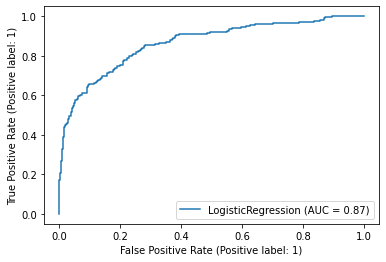

In [89]:
plot_roc_curve(lg, X_train, y_train)

#### KNN

In [90]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [91]:
train_pred_knn = knn.predict(X_train)

test_pred_knn = knn.predict(X_test)

In [92]:
print('Train Metrics')

metrics(y_train, train_pred_knn)

Train Metrics
Confusion Matrix:
 [[838  11]
 [129  51]]


Accuracy Score:
 0.8639455782312925


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       849
           1       0.82      0.28      0.42       180

    accuracy                           0.86      1029
   macro avg       0.84      0.64      0.67      1029
weighted avg       0.86      0.86      0.84      1029



In [93]:
print('Test Metrics')

metrics(y_test, test_pred_knn)

Test Metrics
Confusion Matrix:
 [[377   7]
 [ 43  14]]


Accuracy Score:
 0.8866213151927438


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       384
           1       0.67      0.25      0.36        57

    accuracy                           0.89       441
   macro avg       0.78      0.61      0.65       441
weighted avg       0.87      0.89      0.86       441



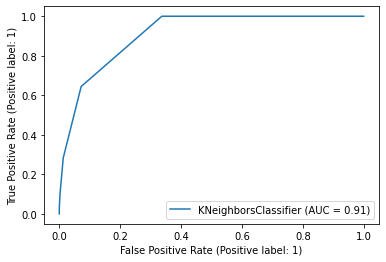

In [94]:
plot_roc_curve(knn, X_train, y_train)

In [95]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

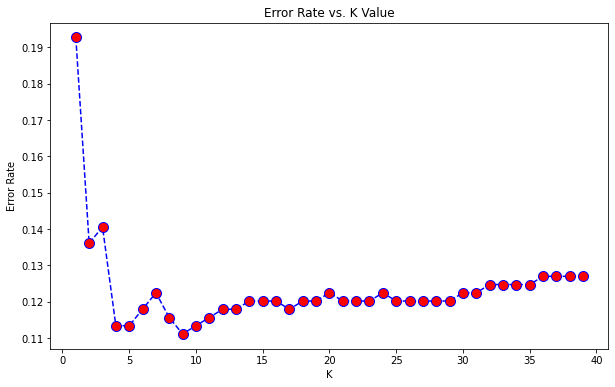

In [96]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [97]:
# n_neighbours 9 has lower error rate for test value, we can choose that

In [98]:
knn = KNeighborsClassifier(n_neighbors=9,n_jobs=-1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9)

In [99]:
train_pred_knn = knn.predict(X_train)

test_pred_knn = knn.predict(X_test)

In [100]:
print('Train Metrics')

metrics(y_train, train_pred_knn)

Train Metrics
Confusion Matrix:
 [[843   6]
 [144  36]]


Accuracy Score:
 0.8542274052478134


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       849
           1       0.86      0.20      0.32       180

    accuracy                           0.85      1029
   macro avg       0.86      0.60      0.62      1029
weighted avg       0.85      0.85      0.81      1029



In [101]:
print('Test Metrics')

metrics(y_test, test_pred_knn)

Test Metrics
Confusion Matrix:
 [[382   2]
 [ 47  10]]


Accuracy Score:
 0.8888888888888888


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       384
           1       0.83      0.18      0.29        57

    accuracy                           0.89       441
   macro avg       0.86      0.59      0.61       441
weighted avg       0.88      0.89      0.86       441



#### Naive Bayes

In [102]:
gb = GaussianNB()

gb.fit(X_train, y_train)

GaussianNB()

In [103]:
train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

In [104]:
print('Train Metrics')

metrics(y_train, train_pred_gb)

Train Metrics
Confusion Matrix:
 [[576 273]
 [ 41 139]]


Accuracy Score:
 0.6948493683187561


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.68      0.79       849
           1       0.34      0.77      0.47       180

    accuracy                           0.69      1029
   macro avg       0.64      0.73      0.63      1029
weighted avg       0.83      0.69      0.73      1029



In [105]:
print('Test Metrics')

metrics(y_test, test_pred_gb)

Test Metrics
Confusion Matrix:
 [[279 105]
 [ 12  45]]


Accuracy Score:
 0.7346938775510204


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.73      0.83       384
           1       0.30      0.79      0.43        57

    accuracy                           0.73       441
   macro avg       0.63      0.76      0.63       441
weighted avg       0.87      0.73      0.78       441



####  SMote 

In [106]:
sm = SMOTETomek(sampling_strategy=0.5,n_jobs=-1)

In [107]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f'The Number of class before the fit \n {y_train.value_counts()}')

print(f'The Number of class after the fit \n {y_train_sm.value_counts()}')

The Number of class before the fit 
 0    849
1    180
Name: Attrition, dtype: int64
The Number of class after the fit 
 0    841
1    416
Name: Attrition, dtype: int64


In [108]:
X_train.shape

(1029, 51)

In [109]:
X_train_sm.shape

(1257, 51)

In [110]:
lg = LogisticRegression(max_iter=100)

lg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [111]:
train_pred = lg.predict(X_train_sm)

test_pred = lg.predict(X_test)

In [112]:
print('Test Metrics')

metrics(y_test, test_pred)

Test Metrics
Confusion Matrix:
 [[340  44]
 [ 19  38]]


Accuracy Score:
 0.8571428571428571


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       384
           1       0.46      0.67      0.55        57

    accuracy                           0.86       441
   macro avg       0.71      0.78      0.73       441
weighted avg       0.88      0.86      0.87       441



In [113]:
print('Train Metrics')
metrics(y_train_sm,train_pred)

Train Metrics
Confusion Matrix:
 [[745  96]
 [135 281]]


Accuracy Score:
 0.8162291169451074


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       841
           1       0.75      0.68      0.71       416

    accuracy                           0.82      1257
   macro avg       0.80      0.78      0.79      1257
weighted avg       0.81      0.82      0.81      1257



### Conclusion:
* Logistics Regression model gave better result.
* SMOTE implemented Logistics model gave a slight improvement  Recall and Precision Score

### Decision Tree

In [114]:
dtree = DecisionTreeClassifier()

In [115]:
dtree.fit(X_train, y_train)

train_pred_tr = dtree.predict(X_train)

test_pred_tr = dtree.predict(X_test)

metrics(y_test,test_pred_tr)

Confusion Matrix:
 [[340  44]
 [ 38  19]]


Accuracy Score:
 0.8140589569160998


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       384
           1       0.30      0.33      0.32        57

    accuracy                           0.81       441
   macro avg       0.60      0.61      0.60       441
weighted avg       0.82      0.81      0.82       441



In [116]:
metrics(y_train, train_pred_tr)

#Decision Tree Results in Over fitting

Confusion Matrix:
 [[849   0]
 [  0 180]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       180

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



### Bagging 

In [117]:
bag = BaggingClassifier(base_estimator=dtree)

In [118]:
bag.fit(X_train, y_train)

train_pred_bag = bag.predict(X_train)

test_pred_bag = bag.predict(X_test)

metrics(y_test,test_pred_bag)

Confusion Matrix:
 [[379   5]
 [ 39  18]]


Accuracy Score:
 0.9002267573696145


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       384
           1       0.78      0.32      0.45        57

    accuracy                           0.90       441
   macro avg       0.84      0.65      0.70       441
weighted avg       0.89      0.90      0.88       441



In [119]:
metrics(y_train, train_pred_bag)

Confusion Matrix:
 [[849   0]
 [ 19 161]]


Accuracy Score:
 0.9815354713313897


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       849
           1       1.00      0.89      0.94       180

    accuracy                           0.98      1029
   macro avg       0.99      0.95      0.97      1029
weighted avg       0.98      0.98      0.98      1029



### Random Forest

In [120]:
rf = RandomForestClassifier()

In [121]:
rf.fit(X_train, y_train)

train_pred_rf = rf.predict(X_train)

test_pred_rf = rf.predict(X_test)

metrics(y_test,test_pred_rf)

Confusion Matrix:
 [[383   1]
 [ 43  14]]


Accuracy Score:
 0.9002267573696145


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       384
           1       0.93      0.25      0.39        57

    accuracy                           0.90       441
   macro avg       0.92      0.62      0.67       441
weighted avg       0.90      0.90      0.87       441



### ADABoost

In [122]:
ada = AdaBoostClassifier()

In [123]:
ada.fit(X_train, y_train)

train_pred_ada = ada.predict(X_train)

test_pred_ada = ada.predict(X_test)

metrics(y_test,test_pred_ada)

Confusion Matrix:
 [[372  12]
 [ 25  32]]


Accuracy Score:
 0.9160997732426304


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       384
           1       0.73      0.56      0.63        57

    accuracy                           0.92       441
   macro avg       0.83      0.77      0.79       441
weighted avg       0.91      0.92      0.91       441



#### Gradient Boosting

In [124]:
gb = GradientBoostingClassifier()

In [125]:
gb.fit(X_train, y_train)

train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

metrics(y_test,test_pred_gb)

Confusion Matrix:
 [[374  10]
 [ 39  18]]


Accuracy Score:
 0.8888888888888888


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       384
           1       0.64      0.32      0.42        57

    accuracy                           0.89       441
   macro avg       0.77      0.64      0.68       441
weighted avg       0.87      0.89      0.87       441



#### XGBoost

In [126]:
xgb = XGBClassifier()

In [127]:
xgb.fit(X_train, y_train)

train_pred_xgb = xgb.predict(X_train)

test_pred_xgb = xgb.predict(X_test)

metrics(y_test,test_pred_xgb)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:28:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix:
 [[373  11]
 [ 33  24]]


Accuracy Score:
 0.9002267573696145


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       384
           1       0.69      0.42      0.52        57

    accuracy                           0.90       441
   macro avg       0.80      0.70      0.73       441
weighted avg       0.89      0.90      0.89       441



In [128]:
params = {
    'learning_rate' : [0.02,0.05, 0.08],
    'max_depth' : [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma' : [0.0,0.1,0.2], #less than 1 make sure
    'colsample_bytree':[0.3,0.4,0.5] #less than 1
}

In [129]:
r_xgb = RandomizedSearchCV(xgb, params, n_jobs=-1, verbose=3)

In [130]:
r_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[08:37:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, s

In [131]:
r_xgb.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.08,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [132]:
best_xgb = XGBClassifier(min_child_weight = 5, max_depth = 4, learning_rate = 0.08, gamma =0.0, colsample_bytree = 0.3)

In [133]:
best_xgb.fit(X_train, y_train)

train_pred_xgb = best_xgb.predict(X_train)

test_pred_xgb = best_xgb.predict(X_test)

metrics(y_test,test_pred_xgb)

[08:37:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix:
 [[381   3]
 [ 35  22]]


Accuracy Score:
 0.9138321995464853


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       384
           1       0.88      0.39      0.54        57

    accuracy                           0.91       441
   macro avg       0.90      0.69      0.74       441
weighted avg       0.91      0.91      0.90       441



#### Light GBM

In [134]:
lgm = LGBMClassifier()

In [135]:
lgm.fit(X_train, y_train)

train_pred_lgm = lgm.predict(X_train)

test_pred_lgm = lgm.predict(X_test)

metrics(y_test,test_pred_lgm)

Confusion Matrix:
 [[377   7]
 [ 36  21]]


Accuracy Score:
 0.9024943310657596


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       384
           1       0.75      0.37      0.49        57

    accuracy                           0.90       441
   macro avg       0.83      0.68      0.72       441
weighted avg       0.89      0.90      0.89       441



#### CAT Boost

In [136]:
cat = CatBoostClassifier()

In [137]:
cat.fit(X_train, y_train)

train_pred_cat = cat.predict(X_train)

test_pred_cat = cat.predict(X_test)

metrics(y_test,test_pred_cat)

Learning rate set to 0.010429
0:	learn: 0.6870037	total: 64.6ms	remaining: 1m 4s
1:	learn: 0.6810195	total: 67.4ms	remaining: 33.6s
2:	learn: 0.6754830	total: 69.6ms	remaining: 23.1s
3:	learn: 0.6679972	total: 71.9ms	remaining: 17.9s
4:	learn: 0.6616733	total: 74.1ms	remaining: 14.7s
5:	learn: 0.6553534	total: 76.1ms	remaining: 12.6s
6:	learn: 0.6487974	total: 78.3ms	remaining: 11.1s
7:	learn: 0.6433973	total: 80.6ms	remaining: 9.99s
8:	learn: 0.6369479	total: 83.3ms	remaining: 9.17s
9:	learn: 0.6313423	total: 85.6ms	remaining: 8.47s
10:	learn: 0.6262910	total: 87.8ms	remaining: 7.9s
11:	learn: 0.6213724	total: 90.1ms	remaining: 7.42s
12:	learn: 0.6160788	total: 92.2ms	remaining: 7s
13:	learn: 0.6109694	total: 95ms	remaining: 6.69s
14:	learn: 0.6060496	total: 97.5ms	remaining: 6.4s
15:	learn: 0.6008174	total: 99.9ms	remaining: 6.14s
16:	learn: 0.5959430	total: 103ms	remaining: 5.94s
17:	learn: 0.5900289	total: 105ms	remaining: 5.74s
18:	learn: 0.5850544	total: 108ms	remaining: 5.56s
19

In [138]:
params_cat = {
    'learning_rate' : [0.02,0.05, 0.07],
    'max_depth' : [3, 4, 5, 6, 8],
    'min_child_samples': [1, 3, 5],
    'l2_leaf_reg':[5,10,15]
}

In [139]:
r_cat = RandomizedSearchCV(cat, params_cat, n_jobs=-1, verbose=1, cv=3)

In [140]:
r_cat.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6821427	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6716135	total: 5.11ms	remaining: 2.55s
2:	learn: 0.6584718	total: 6.71ms	remaining: 2.23s
3:	learn: 0.6471407	total: 8.27ms	remaining: 2.06s
4:	learn: 0.6363805	total: 9.83ms	remaining: 1.96s
5:	learn: 0.6274937	total: 11.4ms	remaining: 1.88s
6:	learn: 0.6196151	total: 12.9ms	remaining: 1.83s
7:	learn: 0.6099471	total: 14.5ms	remaining: 1.8s
8:	learn: 0.6020726	total: 16ms	remaining: 1.76s
9:	learn: 0.5925356	total: 17.5ms	remaining: 1.73s
10:	learn: 0.5849205	total: 19ms	remaining: 1.71s
11:	learn: 0.5786926	total: 20.5ms	remaining: 1.69s
12:	learn: 0.5714312	total: 21.9ms	remaining: 1.66s
13:	learn: 0.5639179	total: 23.8ms	remaining: 1.68s
14:	learn: 0.5574688	total: 25.5ms	remaining: 1.67s
15:	learn: 0.5513397	total: 27ms	remaining: 1.66s
16:	learn: 0.5466212	total: 28.4ms	remaining: 1.64s
17:	learn: 0.5409223	total: 29.8ms	remaining: 1.63s
18:	learn: 0.5358208

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f9a6a15f7d0>,
                   n_jobs=-1,
                   param_distributions={'l2_leaf_reg': [5, 10, 15],
                                        'learning_rate': [0.02, 0.05, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8],
                                        'min_child_samples': [1, 3, 5]},
                   verbose=1)

In [141]:
r_cat.best_params_

{'min_child_samples': 5,
 'max_depth': 4,
 'learning_rate': 0.02,
 'l2_leaf_reg': 10}

In [142]:
best_cat = CatBoostClassifier(min_child_samples=1, max_depth=5, learning_rate = 0.05, l2_leaf_reg = 15)

In [143]:
best_cat.fit(X_train, y_train)

train_pred_cat = best_cat.predict(X_train)

test_pred_cat = best_cat.predict(X_test)

metrics(y_test,test_pred_cat)

0:	learn: 0.6659833	total: 2.45ms	remaining: 2.44s
1:	learn: 0.6368652	total: 5.59ms	remaining: 2.79s
2:	learn: 0.6120270	total: 8.14ms	remaining: 2.71s
3:	learn: 0.5937358	total: 10.1ms	remaining: 2.52s
4:	learn: 0.5724747	total: 12ms	remaining: 2.39s
5:	learn: 0.5537774	total: 14.1ms	remaining: 2.33s
6:	learn: 0.5375733	total: 16.3ms	remaining: 2.31s
7:	learn: 0.5228749	total: 18.6ms	remaining: 2.3s
8:	learn: 0.5098546	total: 22.2ms	remaining: 2.44s
9:	learn: 0.4971469	total: 24.2ms	remaining: 2.4s
10:	learn: 0.4854573	total: 26.2ms	remaining: 2.36s
11:	learn: 0.4746586	total: 28.1ms	remaining: 2.31s
12:	learn: 0.4666141	total: 30.6ms	remaining: 2.32s
13:	learn: 0.4583771	total: 32.8ms	remaining: 2.31s
14:	learn: 0.4516749	total: 35ms	remaining: 2.3s
15:	learn: 0.4436471	total: 37.1ms	remaining: 2.28s
16:	learn: 0.4368261	total: 39ms	remaining: 2.26s
17:	learn: 0.4312659	total: 41ms	remaining: 2.24s
18:	learn: 0.4252755	total: 43.2ms	remaining: 2.23s
19:	learn: 0.4187684	total: 45ms	

### SVM

In [144]:
svm = SVC()

In [145]:
svm.fit(X_train, y_train)

train_pred_svm = svm.predict(X_train)

test_pred_svm = svm.predict(X_test)

metrics(y_test,test_pred_svm)

Confusion Matrix:
 [[382   2]
 [ 42  15]]


Accuracy Score:
 0.9002267573696145


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       384
           1       0.88      0.26      0.41        57

    accuracy                           0.90       441
   macro avg       0.89      0.63      0.68       441
weighted avg       0.90      0.90      0.88       441



In [146]:
c = [1, 0.25, 0.5, 0.75]
kernels = ['linear', 'rbf']
gammas = ['auto', 0.01, 0.001, 1]

In [147]:
grid_svm = GridSearchCV(estimator=svm, param_grid=dict(kernel=kernels, C=c, gamma = gammas), cv=3, verbose=3, n_jobs=-1)

In [148]:
grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.25, 0.5, 0.75],
                         'gamma': ['auto', 0.01, 0.001, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [149]:
grid_svm.best_score_

0.8620019436345968

In [150]:
test_pred_grid = grid_svm.predict(X_test)

metrics(y_test,test_pred_grid)

Confusion Matrix:
 [[372  12]
 [ 30  27]]


Accuracy Score:
 0.9047619047619048


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.69      0.47      0.56        57

    accuracy                           0.90       441
   macro avg       0.81      0.72      0.75       441
weighted avg       0.90      0.90      0.90       441

